In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 

import nltk 
from nltk.corpus import stopwords
import wordcloud
from wordcloud import WordCloud, STOPWORDS

from sklearn.feature_extraction.text import CountVectorizer

In [2]:
! pip install wordcloud

In [3]:
data=pd.read_csv("flipkart_product.csv",encoding="unicode_escape")
data.head(3)

,ProductName,Price,Rate,Review,Summary
0,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",5,Super!,Great cooler.. excellent air flow and for this...
1,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",5,Awesome,Best budget 2 fit cooler. Nice cooling
2,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",3,Fair,The quality is good but the power of air is de...


In [4]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download("vader_lexicon")

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\MAFINYA\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [5]:
data.isnull().sum()

ProductName     0
Price           1
Rate            1
Review          4
Summary        14
dtype: int64

In [6]:
data.dropna(inplace=True)

In [7]:
data.isnull().sum()

ProductName    0
Price          0
Rate           0
Review         0
Summary        0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 189857 entries, 0 to 189872
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   ProductName  189857 non-null  object
 1   Price        189857 non-null  object
 2   Rate         189857 non-null  object
 3   Review       189857 non-null  object
 4   Summary      189857 non-null  object
dtypes: object(5)
memory usage: 8.7+ MB


In [9]:
data.describe()

,ProductName,Price,Rate,Review,Summary
count,189857,189857,189857,189857,189857
unique,811,561,9,1264,98340
top,MILTON Thermosteel Flip Lid 500 ml FlaskÂ Â (P...,"â¹1,299",5,Nan,Good
freq,9278,10005,108684,20852,14175


In [10]:
print(data.shape)

(189857, 5)


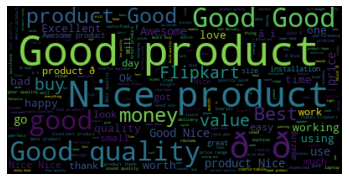

In [11]:
stopwords = set(STOPWORDS)
stopwords.update(["br", "href"])
text = " ".join(review for review in data.Summary)
wordcloud = WordCloud(stopwords=stopwords).generate(text)

plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

In [12]:
df = data.copy()

In [13]:
import string
def rmv_punc(text):
  punct = string.punctuation
  return text.translate(str.maketrans('', '', punct))

In [14]:
df['Summary'] = df['Summary'].apply(lambda x: rmv_punc(x))
df['Price'] = df['Price'].apply(lambda x: rmv_punc(x))
df['Review'] = df['Review'].apply(lambda x: rmv_punc(x))
df['ProductName'] = df['ProductName'].apply(lambda x: rmv_punc(x))

In [15]:
import re
def rmv_char(text):
  text = re.sub('[^a-zA-Z0-9(/)]',' ', str(text))
  text = re.sub('\s+',' ', text) #remove whitespace
  return text

In [16]:
df['Summary'] = df['Summary'].apply(lambda x: rmv_char(x).lower())
df['Review'] = df['Review'].apply(lambda x: rmv_char(x).lower())
df['Price'] = df['Price'].apply(lambda x: rmv_char(x).lower())
df['ProductName']=df['ProductName'].apply(lambda x:rmv_char(x).lower())

In [17]:
df.head()

,ProductName,Price,Rate,Review,Summary
0,candes 12 l roompersonal air cooler white blac...,3999,5,super,great cooler excellent air flow and for this p...
1,candes 12 l roompersonal air cooler white blac...,3999,5,awesome,best budget 2 fit cooler nice cooling
2,candes 12 l roompersonal air cooler white blac...,3999,3,fair,the quality is good but the power of air is de...
3,candes 12 l roompersonal air cooler white blac...,3999,1,useless product,very bad product its a only a fan
4,candes 12 l roompersonal air cooler white blac...,3999,3,fair,ok ok product


In [21]:
! pip install textblob

In [22]:
from textblob import TextBlob
polarity_list = []
for review in df['Summary']:
    tb = TextBlob(review)
    polarity_list.append(tb.sentiment.polarity)
    
#Add the result to the DataFrame
df['Polarity'] = polarity_list
df.head()

,ProductName,Price,Rate,Review,Summary,Polarity
0,candes 12 l roompersonal air cooler white blac...,3999,5,super,great cooler excellent air flow and for this p...,0.725000
1,candes 12 l roompersonal air cooler white blac...,3999,5,awesome,best budget 2 fit cooler nice cooling,0.666667
2,candes 12 l roompersonal air cooler white blac...,3999,3,fair,the quality is good but the power of air is de...,0.433333
3,candes 12 l roompersonal air cooler white blac...,3999,1,useless product,very bad product its a only a fan,-0.455000
4,candes 12 l roompersonal air cooler white blac...,3999,3,fair,ok ok product,0.500000


In [23]:
def sentiment_analysis(polarity):
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'
df['Sentiment'] = df['Polarity'].apply(sentiment_analysis)
df.head()

,ProductName,Price,Rate,Review,Summary,Polarity,Sentiment
0,candes 12 l roompersonal air cooler white blac...,3999,5,super,great cooler excellent air flow and for this p...,0.725000,Positive
1,candes 12 l roompersonal air cooler white blac...,3999,5,awesome,best budget 2 fit cooler nice cooling,0.666667,Positive
2,candes 12 l roompersonal air cooler white blac...,3999,3,fair,the quality is good but the power of air is de...,0.433333,Positive
3,candes 12 l roompersonal air cooler white blac...,3999,1,useless product,very bad product its a only a fan,-0.455000,Negative
4,candes 12 l roompersonal air cooler white blac...,3999,3,fair,ok ok product,0.500000,Positive


<AxesSubplot:xlabel='Sentiment', ylabel='count'>

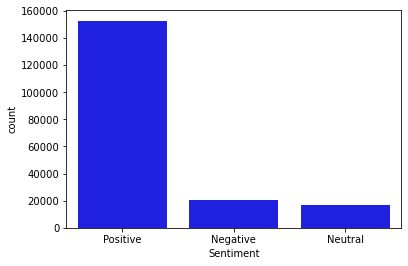

In [25]:
sns.countplot(x=df["Sentiment"], color = 'blue')